In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [12]:
# Load the dataset with column names
data = pd.read_csv('live.csv')

# Select only numeric columns
numeric_columns = data.select_dtypes(include=['number'])

# Calculate mean, median, standard deviation, skewness, and kurtosis
statistics = numeric_columns.agg(['mean', 'median', 'std' , 'skew', 'kurt'])

# correlation matrix
correlation_matrix = numeric_columns.corr()

# statistics using describe()
statistics = numeric_columns.describe()

# Print the results
print("Mean, Median, Standard Deviation, skew, kurt:")
print(statistics)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nBasic Statistics:")
print(statistics)

# To display the first five rows of the data and shape
print(data.head())
data.shape

Mean, Median, Standard Deviation, skew, kurt:
       num_reactions  num_comments   num_shares    num_likes    num_loves  \
count    7050.000000   7050.000000  7050.000000  7050.000000  7050.000000   
mean      230.117163    224.356028    40.022553   215.043121    12.728652   
std       462.625309    889.636820   131.599965   449.472357    39.972930   
min         0.000000      0.000000     0.000000     0.000000     0.000000   
25%        17.000000      0.000000     0.000000    17.000000     0.000000   
50%        59.500000      4.000000     0.000000    58.000000     0.000000   
75%       219.000000     23.000000     4.000000   184.750000     3.000000   
max      4710.000000  20990.000000  3424.000000  4710.000000   657.000000   

          num_wows    num_hahas     num_sads   num_angrys  Column1  Column2  \
count  7050.000000  7050.000000  7050.000000  7050.000000      0.0      0.0   
mean      1.289362     0.696454     0.243688     0.113191      NaN      NaN   
std       8.719650     

(7050, 16)

In [3]:
# I've selected the relavent data 
data = data[['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 
             'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].dropna()


def convert_columns_to_numeric(df):
    
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna()
    return df

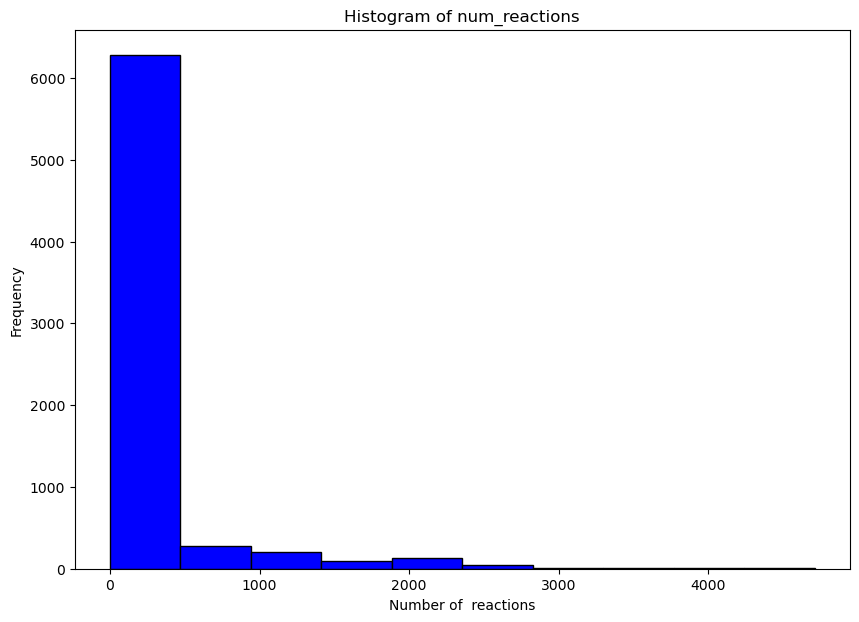

In [4]:
# To plot a histogram for 'numbe of reactions'
def plot_histogram(data, column, bins=10):
    plt.figure(figsize=(10, 7))
    plt.hist(data[column], bins=bins, color='blue', edgecolor='black')
    plt.title(f'Histogram of num_reactions')
    plt.xlabel('Number of  reactions')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(data, 'num_reactions', bins=10)

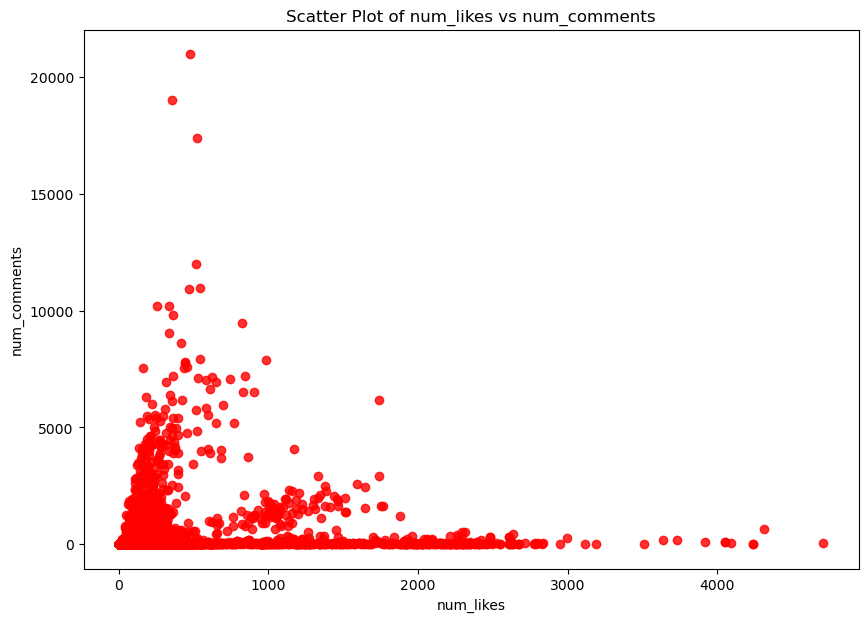

In [11]:
# Scatter plot for 'number of likes' vs 'number of comments'
def scatter_plot(data, x_col, y_col):
    plt.figure(figsize=(10, 7))
    plt.scatter(data[x_col], data[y_col], alpha=0.8, color='red')
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

scatter_plot(data, 'num_likes', 'num_comments')

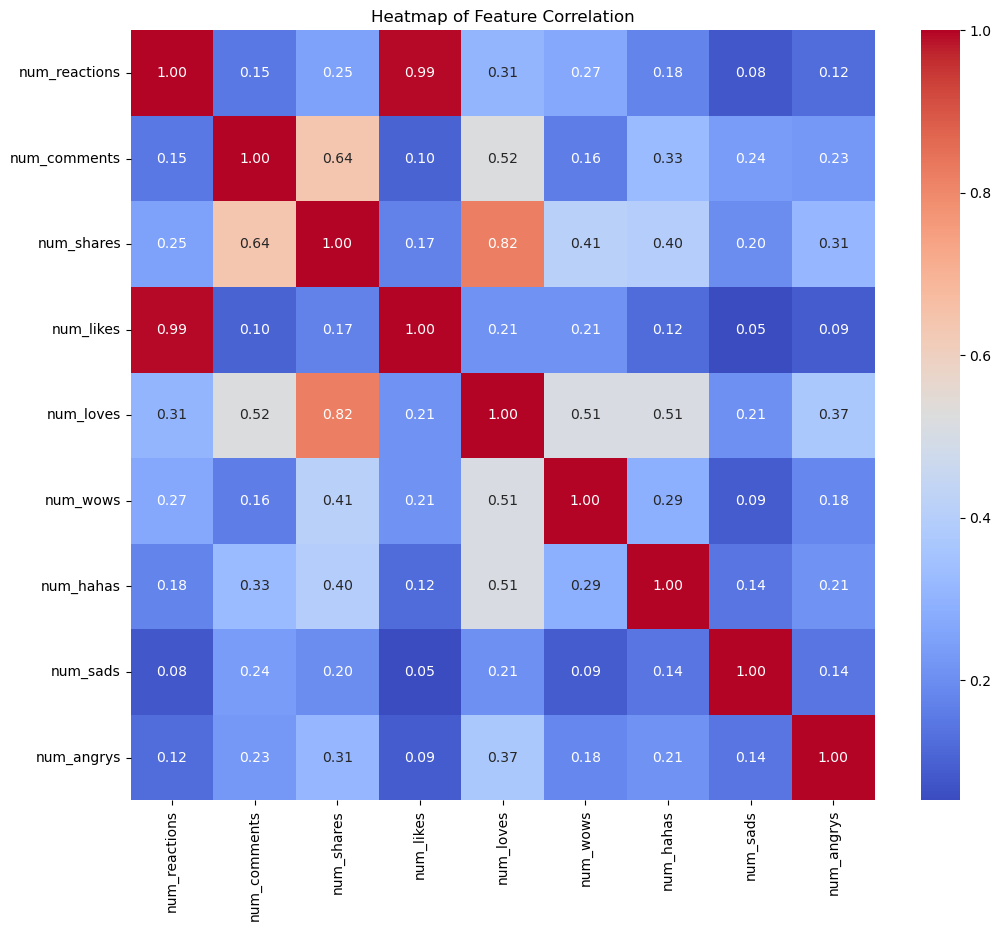

In [6]:
# To plot a Heatmap 
def create_heatmap(data):
    corr = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Heatmap of Feature Correlation')
    plt.show()

create_heatmap(data)

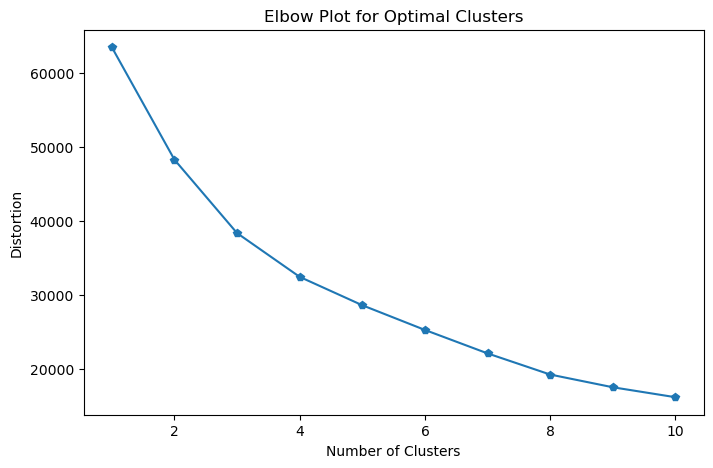

In [7]:
# Elbow plot for K-Means clustering
def elbow_plot(data, max_clusters=10):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(scaled_data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), distortions, marker='p')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.show()

elbow_plot(data, max_clusters=10)

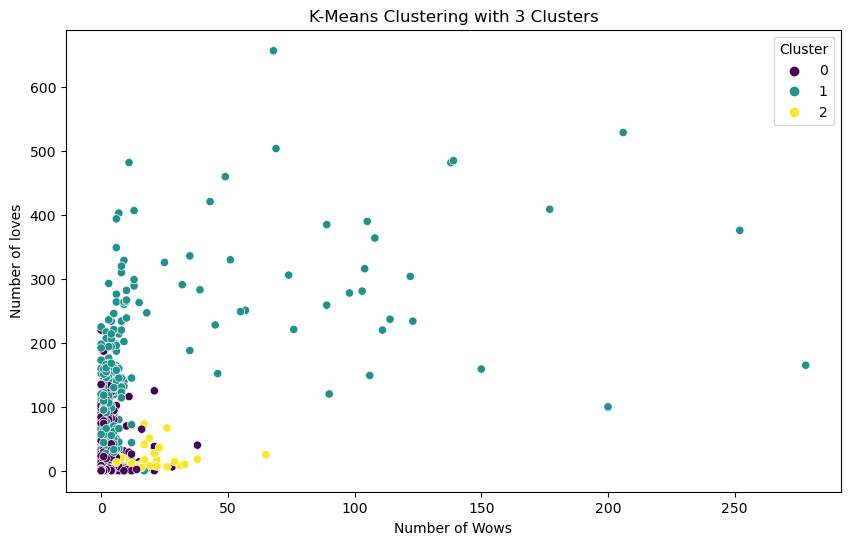

In [8]:
# To show K-Means clustering
def perform_kmeans(data, n_clusters):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=n_clusters, random_state=50)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['num_wows'], y=data['num_loves'], hue=data['Cluster'], palette='viridis')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.xlabel('Number of Wows')
    plt.ylabel('Number of loves')
    plt.legend(title='Cluster')
    plt.show()

perform_kmeans(data, n_clusters=3)

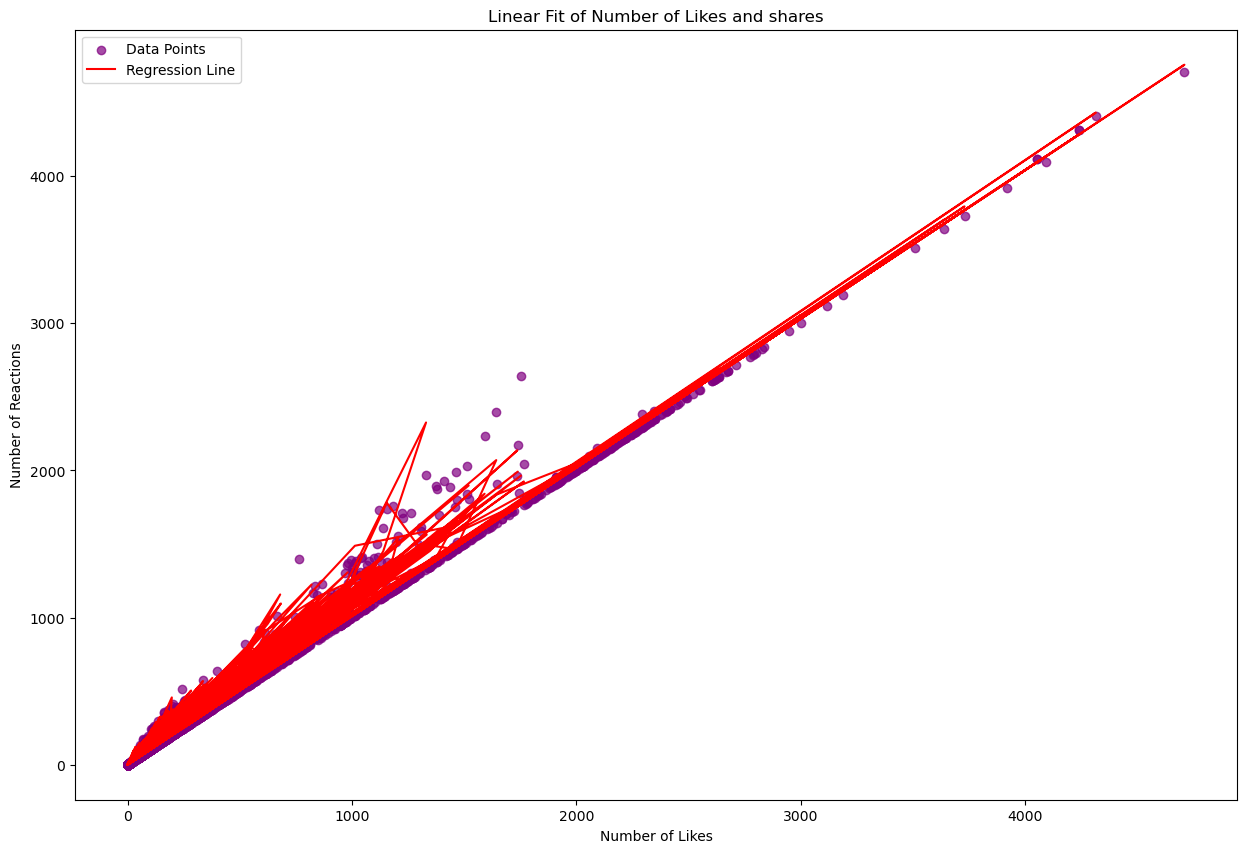

Mean Squared Error of the Linear Fit: 787.016


In [9]:
# Linear regression fitting
def linear_fitting(data):
    model = LinearRegression()
    X = data[['num_likes', 'num_shares']]
    y = data['num_reactions']
    model.fit(X, y)
    predictions = model.predict(X)

    plt.figure(figsize=(15, 10))
    plt.scatter(X['num_likes'], y, label='Data Points', alpha=0.7, color='purple')
    plt.plot(X['num_likes'], predictions, color='red', label='Regression Line')
    plt.title('Linear Fit of Number of Likes and shares')
    plt.xlabel('Number of Likes')
    plt.ylabel('Number of Reactions')
    plt.legend()
    plt.show()

    mse = mean_squared_error(y, predictions)
    print(f'Mean Squared Error of the Linear Fit: {mse:.3f}')

linear_fitting(data)